# Solution 08
Machine Learning WiSe 18/19

Martin Dreher, Adriana Pinto, Eva Bertalan

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

### Excercise 1. Neural Network

In [2]:
training_data = np.array(pd.read_csv('zip.train', sep=' ', header=None))
test_data = np.array(pd.read_csv('zip.test', sep =' ',header=None))

x_train, y_train = training_data[:,1:-1], training_data[:,0]
x_test, y_test = test_data[:,1:], test_data[:,0]

In [3]:
def labels_to_one_hot(labels):
    onehot_encoded = []
    for label in labels:
        vector = np.zeros(10)
        vector[int(label)] = 1
        onehot_encoded.append(vector)
    return np.array(onehot_encoded)

In [4]:
y_vec = labels_to_one_hot(y_train)

In [18]:
class NeuralNetwork:
    def __init__(self, dimensions, learning_rate=0.1):
        self.num_layers = len(dimensions)
        self.lr = learning_rate
                
        self.b = [np.random.randn(y, 1) for y in dimensions[1:]]
        self.w = [np.random.randn(y, x) for x, y in zip(dimensions[:-1], dimensions[1:])]        
        self.dw = [np.zeros(w.shape) for w in self.w]
        self.db = [np.zeros(b.shape) for b in self.b]
        self.loss = []
        self.zs = []
        self.activations = []
        
    def __sigmoid(self, s):
        return 1 / (1 + np.exp(-s))
    
    def __sigmoid_deriv(self, s):
        return self.__sigmoid(s) * (1 - self.__sigmoid(s))
    
    def __feedforward(self, x):
        for b, w in zip(self.b, self.w):
            z = np.dot(w, x.T) + b
            self.zs.append(z)
            activation = self.__sigmoid(z)
            self.activations.append(activation)
        return activation
    
    def __backprop(self, y):
        delta = (self.activations[-1] - y) * self.__sigmoid_deriv(zs[-1])
        
        self.db[-1] = delta
        self.dw[-1] = np.dot(delta, activations[-2].T)

        for i in range(2, self.num_layers):
            z = self.zs[-i]
            delta = np.dot(self.w[-i+1].T, delta) * self.__sigmoid_deriv(z)
            self.db[-i] = delta
            self.dw[-i] = np.dot(delta, activations[-i-1].T)
            
    def train(self, x, y, epochs):
        for i in range(epochs):
            output = self.__feedforward(x)
            self.__backprop(y)
            
            self.w -= self.lr * self.dw
            self.b -= self.lr * self.db
        
        result = np.argmax(output)
        loss = sum(int(i == y) for i in result)
        plt.plot(self.loss)
        
    def predict(self):
        pass

In [21]:
nn = NeuralNetwork([256, 256, 10, 10])

In [22]:
nn.train(x_train, y_vec, 10)

ValueError: shapes (10,10) and (256,7291) not aligned: 10 (dim 1) != 256 (dim 0)

For this implentation we followed this code: https://github.com/mnielsen/neural-networks-and-deep-learning/blob/master/src/network.py
But there were always dimensionality errors.
The other implementation is a simple one with only one hidden layer, but in this case something went also wrong, the loss graph doesn't look how it should, and also an error occured while predictiong the test values.

In [27]:
class NeuralNetwork:
    def __init__(self, x, y, n_hidden, learning_rate=0.1):
        self.x = x
        self.y = y
        self.n_input = x.shape[1]
        self.n_hidden = n_hidden
        self.n_output = y.shape[1]
        self.lr = learning_rate
        self.__initialize_weights()
        self.loss = []
        
    def __initialize_weights(self):
        self.w1 = np.random.rand(self.n_input, self.n_hidden)
        self.b1 = np.zeros((1, self.n_hidden))
        
        self.w2 =  np.random.rand(self.n_hidden, self.n_output) 
        self.b2 = np.zeros((1, self.n_output))
        
    def __sigmoid(self, s):
        s = s + 10**-10
        return 1 / (1 + np.exp(-s))
    
    def __sigmoid_deriv(self, s):
        return self.__sigmoid(s) * (1 - self.__sigmoid(s))
    
    def __feedforward(self, x):
        self.a1 = self.__sigmoid(np.dot(x, self.w1)) + self.b1
        self.a2 = self.__sigmoid(np.dot(self.a1, self.w2)) + self.b2 
        return self.a2
    
    def __backprop(self, output):
        delta = self.y - output
        d_w2 = np.dot(self.a1.T, (delta * self.__sigmoid_deriv(output)))
        d_w1 = np.dot(self.x.T, (np.dot(delta * self.__sigmoid_deriv(output), self.w2.T) * self.__sigmoid_deriv(self.a1)))

        self.w1 += self.lr * d_w1
        self.w2 += self.lr * d_w2
    
    def train(self, epochs):
        for i in range(epochs):
            output = self.__feedforward(self.x)
            error = np.mean((output - self.y)** 2)
            self.loss.append(error)
            print('loss:', error)
            
            self.__backprop(output)
        
        plt.plot(self.loss)
        
    
    def predict(self, X):
        return np.argmax(self.__feedforward(X))

In [28]:
neural_net = NeuralNetwork(x_train, y_vec, 10)

loss: 0.25745050062765584
loss: 0.24997772700567675
loss: 0.1474212880780532
loss: 0.832752708819092
loss: 0.1603841707637277
loss: 0.1
loss: 0.10008229323824991
loss: 0.25000000002
loss: 0.1
loss: 0.09065971722115451
loss: 0.16168856880983531
loss: 0.1414205453555733
loss: 0.18754768127390203
loss: 0.16723357564041427


/Users/evabertalan/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp


loss: 0.20786799297156328
loss: 0.2550786970876038
loss: 0.11184097560987441
loss: 0.25354448679226993
loss: 0.3214005699860011
loss: 0.10037031957188158
loss: 0.1238924701477636
loss: 0.18751470655009253
loss: 0.12550302306728975
loss: 0.31319958992668223
loss: 0.2121319598288326
loss: 0.0999999706533563
loss: 0.2425028230474497
loss: 0.11261829652899903
loss: 0.2589798398310395
loss: 0.23541416669245155
loss: 0.11905084716747397
loss: 0.2906170108207879
loss: 0.20841183572105287
loss: 0.10142084111684507
loss: 0.1434915259472171
loss: 0.10999730893429085
loss: 0.1467624329977302
loss: 0.19285304416580576
loss: 0.09738974548981408
loss: 0.25857403173783333
loss: 0.16886850639811277
loss: 0.1638226010657835
loss: 0.13289230533693416
loss: 0.08767760249406133
loss: 0.3158977635300734
loss: 0.10306888874589677
loss: 0.20624731024964055
loss: 0.08630410777283214
loss: 0.24398783540946312
loss: 0.07657217249931443
loss: 0.24061993302964185
loss: 0.10132018506786959
loss: 0.1369553652673880

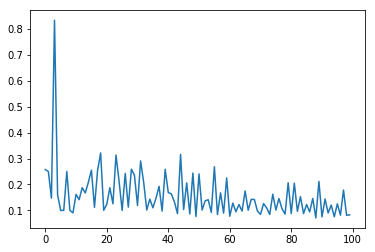

In [29]:
neural_net.train(100)

In [30]:
output = neural_net.predict(x_test)

/Users/evabertalan/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
